In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#my_data = pd.read_excel('./dataset/Concrete_Data.xls')
#my_data.to_csv ('./dataset/Concrete_Data.csv',header=True, index=None) #converting xls to csv file
my_data = pd.read_csv('./dataset/Concrete_Data.csv',header=0, skipinitialspace=True) #read the data
my_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
#renaming all my columns
header_names=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age in days','Concrete compressive strength']
df = pd.read_csv('./dataset/Concrete_Data.csv', header=None, skiprows=1, names=header_names)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age in days,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.isna().sum()             #to check if anny columsn in df1 has missing values
print(df.isna().sum())
df = df.dropna()           #to drop any columns with missing values

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age in days                      0
Concrete compressive strength    0
dtype: int64


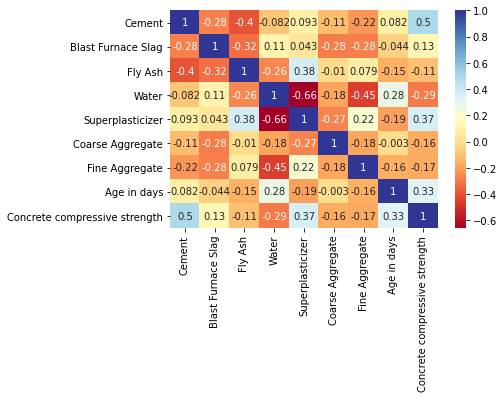

In [5]:
cor = df.corr()
sn.heatmap(cor, annot = True, cmap = plt.cm.RdYlBu)
plt.show()

In [6]:
print(df.dtypes.value_counts())
print(df.shape)

float64    8
int64      1
dtype: int64
(1030, 9)


In [7]:
# 2) Extract data
X = df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age in days']]
Y = df['Concrete compressive strength']

#print(X)
#print(Y)


lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, Y)


r2_value = 0

Y_pred = Y_pred = lin_reg.predict(X)

r2_value = r2_score(Y, Y_pred)



print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)



print('R-squared Coefficient of determination: %.2f'
      %r2_value)

Coefficients:  [ 0.11978526  0.10384725  0.08794308 -0.1502979   0.29068694  0.01803018
  0.02015446  0.11422562]
Intercept:  -23.16375581107912
R-squared Coefficient of determination: 0.62
